---------------------------------
#### Construct a Word2Vec model using Gensim 
- with the following key parameters:-
-------------------------------------

- `sentences`: 
    - This parameter denotes the data used for training the model to generate word embeddings. 
    - It can be a list of token/word lists or a data stream from network/disk for larger corpora. 
    - In our illustration, we will utilize the Brown Corpus from NLTK.
- `size`: 
    - This parameter determines the dimensionality of the vector for each word in the vocabulary.
    - The default size is 100.
- `window`: 
    - The maximum distance between the current word and its neighboring words. If the distance exceeds the specified window width, some neighboring words will not be considered related to the current word. 
    - The default window size is 5.
- `min_count`: 
    - This parameter sets the minimum frequency value for words to be included in the vocabulary.
    - The default minimum count is 5.
- `iter`: 
    - It signifies the number of iterations or epochs over the dataset. 
    - The default number of iterations is 5."

In [1]:
import string
import nltk

from nltk.corpus import brown
from gensim.models import Word2Vec

from sklearn.decomposition import PCA
from matplotlib import pyplot

In [2]:
nltk.download("brown")

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\bhupe\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [3]:
# Load Brown Corpus
sentences = brown.sents()

In [4]:
len(sentences)

57340

In [19]:
# Train Word2Vec model
model = Word2Vec(sentences, 
                 vector_size =100, 
                 window      =5, 
                 min_count   =5, 
                 epochs      =5)

In [20]:
# Vector for word love
print("Vector for 'love':")
print(model.wv["love"])
print()

Vector for 'love':
[ 0.09965287  0.34675196  0.18208998 -0.12794438 -0.1396839   0.2179791
  0.2101222   0.30446917 -0.34410796 -0.21671273 -0.05396256  0.06229055
 -0.07046    -0.09825758  0.345986   -0.27512014  0.16348536 -0.383712
 -0.2999412  -0.8568245   0.14953479  0.4683037   0.9564698   0.13506693
 -0.18817584  0.05649614 -0.498766   -0.5046139   0.0191229   0.66016346
  0.5594827  -0.2473597   0.6456822  -0.5543639  -0.2875247   0.6021711
 -0.568963   -0.00780368  0.10337564 -0.22702628 -0.3936696   0.14817835
  0.8183937   0.33058292  0.18958703  0.14559892 -0.27921757 -0.09908628
 -0.19839951  0.20486851 -0.24949022  0.00821035 -0.597518   -0.5304882
  0.06601316 -1.0962336   0.33972326  0.21363443 -0.02694671  0.09389292
 -0.00712776  0.2747362   0.15149954  0.12818417 -0.473364    0.44329518
  1.0163598   0.0551398  -0.56917423  0.4071438   0.5099249   0.14576882
 -0.09664933  0.17629503  0.8292479  -0.40598828  0.17468776 -0.14415124
  0.10016484 -0.10879057 -0.42203993 

In [23]:
# Finding most similar words
print("3 words similar to 'cycle':")
similar_words = model.wv.most_similar("cycle", topn=3)
for word, similarity in similar_words:
    print(word, similarity)
print()

3 words similar to 'cycle':
registration 0.9725694060325623
night's 0.9676118493080139
mucosa 0.9628748297691345



In [26]:
import matplotlib.pyplot as plt

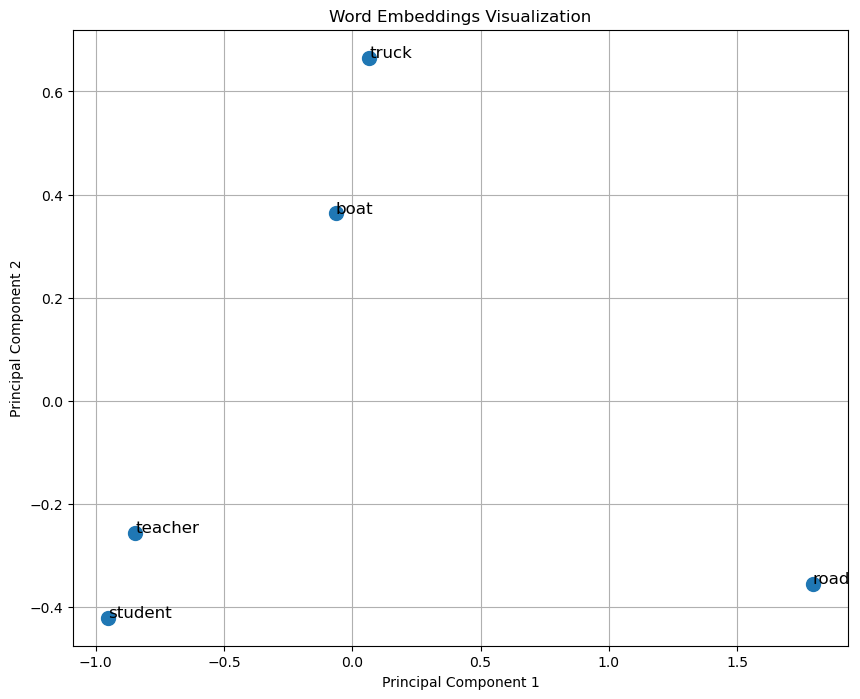

In [27]:
words = ["france", "germany", "india", "truck", "boat", "road", "teacher", "student"]

# Ensure that all words are in the model's vocabulary
filtered_words = [word for word in words if word in model.wv.key_to_index]

X = model.wv[filtered_words]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Plotting the words
plt.figure(figsize=(10, 8))
plt.scatter(result[:, 0], result[:, 1], marker='o', s=100)

# Annotating each point with the corresponding word
for i, word in enumerate(filtered_words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=12)

plt.title('Word Embeddings Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)